<div>
<img src="opencosmo_simple_transparent.png" width="600">
</div>

# OpenCosmo Tutorial - investigating the Frontier-E mass function

In this tutorial we're going to download some simple halo property data using the portal, open it using the opencosmo toolkit, and then compute the halo mass function and compare it to a basic model. The halo mass function is a strong probe of cosmology, as the prevalence of rare high-mass clusters is very sensitive to cosmological parameters. It can be difficult to measure in observations as cluster mass measurements come with a range of systematics, but it's fairly straightforward in simulations, given a choice of mass definition. 

First let's go to the [OpenCosmo](https://cosmoexplorer.alcf.anl.gov) portal, log in using your ALCF credentials (when it asks for the institution pick Argonne LCF), and navigate to Halo Query (GO). Then select the following:  


|Complete          |  Option |
|:------------------|:--------|
| Simulation               | Frontier GO      | 
| Limit     | 1000      | 
| Step               | 624      | 
| Include Profiles| Yes      | 
| M200c high | 1e16      | 
| M200c low| 1e14      | 

Hit start flow, and wait for the output. You should see a progress screen showing where you are in the process. 

<img src="loading.gif" width="500" align="center">

<div class="alert alert-block alert-info"><b>Tip: </b> If something goes wrong during this workshop, please feel free to ask us. To get more information, hit the three vertical dots, and click "open in globus" to go to the globus page for this flow, and go to the event log to see more details.  </div> 


If all goes well, after a few minutes you should have a download button to get the data onto your machine! Let's get started playing with it. But first let's install the toolkit


## The toolkit

Patrick made us a nice toolkit to work with this data, to do that let's go and follow the install instructions on the documentation [here](https://opencosmo.readthedocs.io/en/latest/installation.html), but the shortcut version is to install this with conda you can just run this code to get a new environment with opencosmo


```bash
conda create -n opencosmo python=3.11
conda activate opencosmo
pip install opencosmo
```

For later in the tutorial I'm going to use also matplotlib and pyccl so if you want to save some time, now run 
```bash
conda install matplotlib
conda install -c conda-forge cblas
conda install -c conda-forge pyccl 
```
**Note**: pyccl has some issues installing via conda in Python 3.12 environments. If you expereince problems, you can install with `pip install pyccl` or downgrade to Python 3.11. You will need CMAKE to install with pip. See [the pyccl documentation](https://ccl.readthedocs.io/en/latest/source/installation.html) for more info.

I've done that before creating this notebook so if you'd like to follow along and do this in a notebook add these two lines on your terminal to add jupyter to our environment and then open a notebook

```bash
conda install jupyter
jupyter lab
```

<div class="alert alert-block alert-info"><b>Tip: </b> If you forgot this step earlier you can update your conda environment on another terminal and then just refresh your kernel and it should update </div> 


Now let's use the toolkit to open the data, here the syntax is just 

```python
opencosmo.open(filepath)
```

and it opens it as an OpenCosmo Dataset which holds the cosmology, data, and units

<div class="alert alert-block alert-info"><b>Tip: </b> This data is stored as astropy objects, you can directly access the cosmology and data using dataset.cosmology and dataset.data, and then inspect it as usual  </div> 

I am going to quickly have a look at all the properties we have


In [94]:
print(list(dataset.data.keys()))

['block', 'fof_halo_1D_vel_disp', 'fof_halo_center_x', 'fof_halo_center_y', 'fof_halo_center_z', 'fof_halo_com_vx', 'fof_halo_com_vy', 'fof_halo_com_vz', 'fof_halo_com_x', 'fof_halo_com_y', 'fof_halo_com_z', 'fof_halo_mass', 'fof_halo_tag', 'sod_halo_1D_vel_disp', 'sod_halo_GasFracShell2500c', 'sod_halo_L500cBolo', 'sod_halo_L500cBoloEx', 'sod_halo_L500cErositaHi', 'sod_halo_L500cErositaHiEx', 'sod_halo_L500cErositaLo', 'sod_halo_L500cErositaLoEx', 'sod_halo_L500cRosat', 'sod_halo_L500cRosatEx', 'sod_halo_M200m', 'sod_halo_M2500c', 'sod_halo_M500c', 'sod_halo_MGas200m', 'sod_halo_MGas2500c', 'sod_halo_MGas500c', 'sod_halo_MGasHot500c', 'sod_halo_MGasVir', 'sod_halo_MStar200m', 'sod_halo_MStar2500c', 'sod_halo_MStar500c', 'sod_halo_MStarVir', 'sod_halo_MVir', 'sod_halo_R200m', 'sod_halo_R2500c', 'sod_halo_R500c', 'sod_halo_RVir', 'sod_halo_T500c', 'sod_halo_T500cBolo', 'sod_halo_T500cBoloEx', 'sod_halo_Y500c', 'sod_halo_Y5R500c', 'sod_halo_bhr', 'sod_halo_c_acc_mass', 'sod_halo_c_peak_m

## FAQ
### - what are the units?

Typically we have HACC outputs in comoving units, with h factors, e.g. the box sizes are in comoving Mpc/h. However when this toolkit loads them in, it removes the h factors and keeps it in comoving units. Have a look [here](https://opencosmo.readthedocs.io/en/latest/main_api.html#unit-conventions) for more unit options and how to convert these within the toolkit. The units are stored with the data and you can access them using e.g.
```python
print(dataset.data['fof_halo_mass'].unit)
```

### - what properties are there?
The full list can be obtained using  
```python
print(dataset.data.keys())
```
Make sure to reload the full dataset if you've cut it down. However, this some of the abbreviations might not be very clear. Some of these are (this is for both hydro and gravity-only outputs so not all will be present in this dataset)

- block: a convenience output to show how the data is stored, can help to match between different datasets
- fof_halo_tag: unique in a snapshot, these are the halo tags we typically use to name the halos
- com: stands for center of mass
- vel_disp: velocity dispersion
- fof: found using a friends-of-friends clustering algorithm
- sod: spherical-overdensity clustering algorithm
- L500c: xray-luminosity within an SOD radius where the density corresponds to 500x the critical density of the universe
- Bolo: bolometric
- Rosat/Erosita: xray surveys
- MGas: mass which is classified as a gas
- MStar: stellar mass
- Vir: virial radius
- Ex: core excised
- T: temperature
- Y: compton-y parameter
- dm: dark matter
- cdelta: concentration
- c_peak_mass, c_acc_mass: different concentration measurements


### Filtering

Now we have already filtered the data on the portal, but let's see how to do that here too just for fun.
The syntax is 
```python
dataset.filter(oc.col(colname)>criteria_min, oc.col(colname)==criteria_equal)
```
you can also select properties to keep using 
```python
dataset.select([property1,property2])
```
and take a random sampling of that using 
```python
dataset.take(howmany,at='random')
```

Remember that these are comoving units without any h-factors, so not quite our standard hacc units. Using these selections can really speed this up for large datasets so remember to pare down the list of columns you need. 

In [103]:
dataset = dataset.filter(oc.col("sod_halo_mass") > 1e14).select(["fof_halo_mass","sod_halo_mass"])

Let's make a binned halo mass function - really the only thing you need to do for this is to create some mass bins and compute the count of halos in these bins. We're going to use CCL to get the Tinker et al 2008 mass function (there are many implementations to choose from and plenty of other mass functions in CCL to use), and use scipy's binned statistics function to get the number counts in each mass bin. We're using the SOD masses as this is most similar to what the implementation expects. 

In [104]:
from scipy.stats import binned_statistic
import numpy as np
from pyccl.halos.hmfunc.tinker08 import MassFuncTinker08
import matplotlib.pyplot as plt
import pyccl as ccl

mass_type = 'sod_halo_mass'

mass_bins = np.logspace(np.log10(2.e13),np.log10(np.max(dataset.data[mass_type])),21)
counts, edges, binnum = binned_statistic(x=dataset.data[mass_type],values =dataset.data[mass_type],bins=mass_bins, statistic='count')
mids, edges, binnum = binned_statistic(x=dataset.data[mass_type],values =dataset.data[mass_type],bins=mass_bins, statistic='mean')




Now the units of the mass function are often not in counts but in counts per base10 logarithmic unit of mass per unit volume, so we do a few sneaky corrections here. 

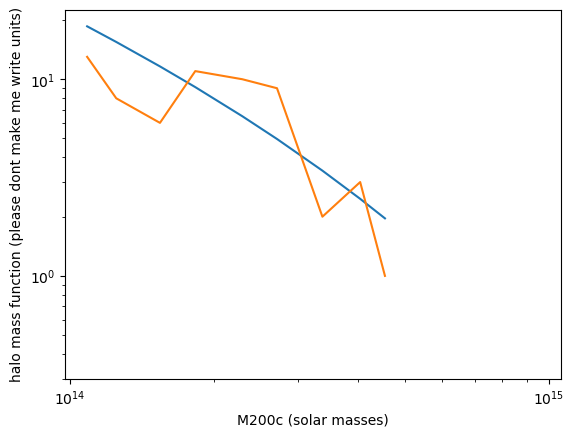

In [105]:
cosmo = ccl.Cosmology(Omega_c=0.26067, Omega_b=0.0489, h=0.6766, sigma8=0.8102, n_s=0.9665)
hmf = MassFuncTinker08(mass_def='200c')
# hmf units are in dN/d(log10(M)) per unit volume

plt.loglog(mids,hmf(cosmo,mids,1.0)*(np.log10(edges[1:])-np.log10(edges[:-1]))*(128/0.6766)**3.)
plt.loglog(mids,counts)
plt.xlabel('M200c (solar masses)')
plt.ylabel('halo mass function (please dont make me write units)')
plt.show()

## Conclusions 

And we're done! There's a large number of other halo properties you can look at, so go ahead and explore the halo properties and their dependencies if you like. In the next guided examples I'll take you through how to look at more complex matched data. 

### Challenges
- Check the halo mass function at multiple redshifts, see which HMF model our data best matches
- Check the concentration-mass relation, measuring both the standard error and the measurement error in the bins
- Look at the mass-xray luminosity relation. Tell us if it matches data